In [1]:
import numpy as np
from tensorflow.keras.layers import Dense, Activation, Input,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('../dataset1/handtrain.csv', delimiter=',')

angle = data[:,:-1].astype(np.float32)
label = data[:, -1].astype(np.float32)

print(angle.shape, label.shape)

(1296, 15) (1296,)


In [3]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

encoded_label = ohe.fit_transform(label.reshape(-1, 1)).toarray()
encoded_label = encoded_label.astype(np.float32)

print(encoded_label.shape)

(1296, 26)


In [4]:
ohe.categories_

[array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.],
       dtype=float32)]

In [5]:
input = Input(shape=(15,))

x = Dense(32, activation='relu')(input)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.25)(x)

x = Dense(32, activation='relu')(x)

output = Dense(26, activation='softmax')(x)

model = Model(inputs=input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense (Dense)               (None, 32)                512       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                             

In [27]:
history=model.fit(angle, encoded_label, epochs=400)
history.history.keys()

Epoch 1/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1599 - acc: 0.9576
Epoch 2/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1632 - acc: 0.9506
Epoch 3/400
41/41 [==============================] - 0s 4ms/step - loss: 0.1463 - acc: 0.9568
Epoch 4/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1457 - acc: 0.9552
Epoch 5/400
41/41 [==============================] - 0s 4ms/step - loss: 0.1862 - acc: 0.9460
Epoch 6/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1186 - acc: 0.9653
Epoch 7/400
41/41 [==============================] - 0s 4ms/step - loss: 0.1056 - acc: 0.9707
Epoch 8/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1312 - acc: 0.9622
Epoch 9/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1305 - acc: 0.9637
Epoch 10/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1194 - acc: 0.9614
Epoch 11/400
41/41 [==============================] - 0s 3m

41/41 [==============================] - 0s 3ms/step - loss: 0.1276 - acc: 0.9606
Epoch 88/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1511 - acc: 0.9545
Epoch 89/400
41/41 [==============================] - 0s 4ms/step - loss: 0.1246 - acc: 0.9622
Epoch 90/400
41/41 [==============================] - 0s 4ms/step - loss: 0.1225 - acc: 0.9599
Epoch 91/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1308 - acc: 0.9622
Epoch 92/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1437 - acc: 0.9576
Epoch 93/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1377 - acc: 0.9653
Epoch 94/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1458 - acc: 0.9506
Epoch 95/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1841 - acc: 0.9498
Epoch 96/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1414 - acc: 0.9537
Epoch 97/400
41/41 [==============================] - 0s 3ms/st

41/41 [==============================] - 0s 4ms/step - loss: 0.1167 - acc: 0.9684
Epoch 173/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1064 - acc: 0.9637
Epoch 174/400
41/41 [==============================] - 0s 4ms/step - loss: 0.1092 - acc: 0.9660
Epoch 175/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1477 - acc: 0.9576
Epoch 176/400
41/41 [==============================] - 0s 4ms/step - loss: 0.1217 - acc: 0.9576
Epoch 177/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1309 - acc: 0.9576
Epoch 178/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1410 - acc: 0.9591
Epoch 179/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1399 - acc: 0.9660
Epoch 180/400
41/41 [==============================] - 0s 4ms/step - loss: 0.1770 - acc: 0.9568
Epoch 181/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1192 - acc: 0.9660
Epoch 182/400
41/41 [==============================] -

41/41 [==============================] - 0s 3ms/step - loss: 0.1406 - acc: 0.9568
Epoch 258/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1051 - acc: 0.9668
Epoch 259/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1265 - acc: 0.9668
Epoch 260/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1232 - acc: 0.9653
Epoch 261/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1138 - acc: 0.9614
Epoch 262/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1282 - acc: 0.9606
Epoch 263/400
41/41 [==============================] - 0s 4ms/step - loss: 0.1460 - acc: 0.9614
Epoch 264/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1463 - acc: 0.9622
Epoch 265/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1179 - acc: 0.9645
Epoch 266/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1481 - acc: 0.9599
Epoch 267/400
41/41 [==============================] -

41/41 [==============================] - 0s 4ms/step - loss: 0.1224 - acc: 0.9630
Epoch 343/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1475 - acc: 0.9583
Epoch 344/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1003 - acc: 0.9707
Epoch 345/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1184 - acc: 0.9622
Epoch 346/400
41/41 [==============================] - 0s 4ms/step - loss: 0.1460 - acc: 0.9591
Epoch 347/400
41/41 [==============================] - 0s 4ms/step - loss: 0.1416 - acc: 0.9522
Epoch 348/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1248 - acc: 0.9630
Epoch 349/400
41/41 [==============================] - 0s 3ms/step - loss: 0.1491 - acc: 0.9599
Epoch 350/400
41/41 [==============================] - 0s 4ms/step - loss: 0.1335 - acc: 0.9630
Epoch 351/400
41/41 [==============================] - 0s 4ms/step - loss: 0.1279 - acc: 0.9660
Epoch 352/400
41/41 [==============================] -

dict_keys(['loss', 'acc'])

In [13]:
def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

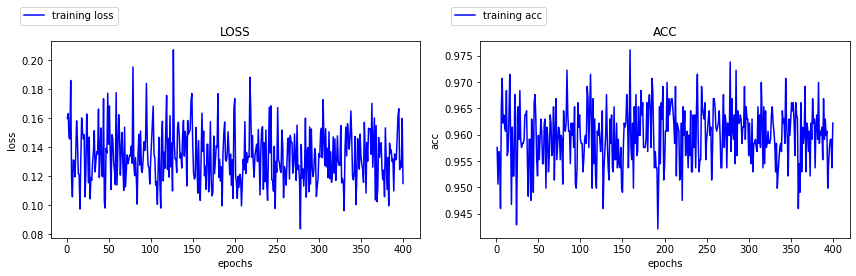

In [29]:
plot_history(history)

In [33]:
# print(history.history['loss'])
print(history.history['acc'][284])


0.9722222089767456


In [34]:
model.save('handtrain(400(97.2)).h5')